In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import seaborn as sns
from sklearn.mixture import GaussianMixture
from tqdm import tqdm_notebook

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [3]:
with h5py.File('observations.h5', 'r') as f:
    m1s = array(f['posteriors/m1det'])
    m2s = array(f['posteriors/m2det'])
    dls = array(f['posteriors/dl'])

In [4]:
scores = []
ngs = []

In [5]:
for ng in tqdm_notebook(range(1, 10)):
    s = []
    gmm = GaussianMixture(ng)
    ns = m1s.shape[1]
    p = random.permutation(ns)
    
    n2 = ns // 2

    for i in range(m1s.shape[0]):
        gmm.fit(column_stack((m1s[i,p][:n2], m2s[i,p][:n2], dls[i,p][:n2])))
        s.append(gmm.score(column_stack((m1s[i,p][n2:], m2s[i,p][n2:], dls[i,p][n2:]))))
    
    s = array(s)
    scores.append(s)
    ngs.append(ng)
scores = array(scores)

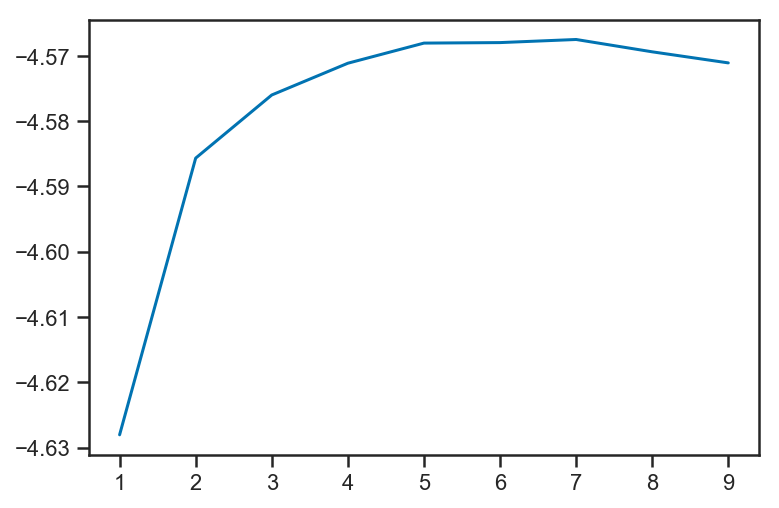

In [6]:
plot(ngs, mean(scores,axis=1))

It appears that we maximize the average score on the test sets when there are seven Gaussians in the likelihood (I'm surprised!).

In [7]:
ngs[argmax(mean(scores,axis=1))]

7